In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
odf=pd.read_csv('data.csv')

In [57]:
odf

,Unnamed: 0,FacultyId,Name,Gender,Age,JoiningYear,Designation,AreaOfSpecialization,AppointmentType,EndYear,EndMonth
0,0,0,Gina Hawkins,Male,54,2006,Research Professor,Environmental Engineering,Conract,2022,June
1,1,1,Brian Rodriguez,Female,47,2008,Lecturer,Software Engineering,Approve,2022,June
2,2,2,Walter Carson,Female,60,2003,Dean,Chemical Engineering,Regular,2022,July
3,3,3,Lindsay White,Female,51,2007,Associate Professor,Computer Engineering,Approve,2022,June
4,4,4,Jeffrey Young,Female,42,2010,Research Professor,Robotics and Automation,Regular,2022,May
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,Jerome King,Male,45,2003,Senior Professor,Data Science and Engineering,Approve,2016,May
9996,9996,9996,Tiffany Smith,Female,47,2002,Senior Professor,Geotechnical Engineering,Regular,2016,June
9997,9997,9997,Dr. Lauren Rivera MD,Female,58,1999,Director,Data Science and Engineering,Regular,2016,July
9998,9998,9998,George Bartlett,Male,50,2001,Research Professor,Environmental Engineering,Regular,2016,June


In [58]:
df=odf.drop(['Unnamed: 0', 'FacultyId', 'Name'], axis=1)

In [59]:
x1 = df.iloc[:, :-2]
x1['EndMonth']= odf['EndMonth']
y = df.iloc[:, 6]  # Dependent variable

In [60]:
x1


,Gender,Age,JoiningYear,Designation,AreaOfSpecialization,AppointmentType,EndMonth
0,Male,54,2006,Research Professor,Environmental Engineering,Conract,June
1,Female,47,2008,Lecturer,Software Engineering,Approve,June
2,Female,60,2003,Dean,Chemical Engineering,Regular,July
3,Female,51,2007,Associate Professor,Computer Engineering,Approve,June
4,Female,42,2010,Research Professor,Robotics and Automation,Regular,May
...,...,...,...,...,...,...,...
9995,Male,45,2003,Senior Professor,Data Science and Engineering,Approve,May
9996,Female,47,2002,Senior Professor,Geotechnical Engineering,Regular,June
9997,Female,58,1999,Director,Data Science and Engineering,Regular,July
9998,Male,50,2001,Research Professor,Environmental Engineering,Regular,June


In [61]:
y

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
9995    2016
9996    2016
9997    2016
9998    2016
9999    2016
Name: EndYear, Length: 10000, dtype: int64

### Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x1['EndMonthEC'] = label_encoder.fit_transform(x1['EndMonth'])
x1['DesignationEC'] = label_encoder.fit_transform(x1['Designation'])
x1['AreaOfSpecializationEC'] = label_encoder.fit_transform(x1['AreaOfSpecialization'])
x1['GenderEC'] = label_encoder.fit_transform(x1['Gender'])
x1['AppointmentTypeEC'] = label_encoder.fit_transform(x1['AppointmentType'])

In [63]:
x=x1.drop(['Gender','Designation','AreaOfSpecialization','AppointmentType','EndMonth'],axis=1)

In [64]:
x

,Age,JoiningYear,EndMonthEC,DesignationEC,AreaOfSpecializationEC,GenderEC,AppointmentTypeEC
0,54,2006,4,5,6,1,1
1,47,2008,4,4,10,0,0
2,60,2003,3,2,1,0,2
3,51,2007,4,1,3,0,0
4,42,2010,6,5,9,0,2
...,...,...,...,...,...,...,...
9995,45,2003,6,6,4,1,0
9996,47,2002,4,6,7,0,2
9997,58,1999,3,3,4,0,2
9998,50,2001,4,5,6,1,2


### Data Splitting

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assume you have features 'X' and target variable 'y'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [66]:



# Create a linear regression model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)


In [67]:
mse

1.020405747045016

In [68]:
y_test

9394    2016
898     2022
2398    2021
5906    2019
2343    2021
        ... 
1037    2022
2899    2021
9549    2016
2740    2021
6690    2018
Name: EndYear, Length: 2000, dtype: int64

In [69]:
y_pred

array([2016.34593915, 2021.10155331, 2021.01136838, ..., 2015.63347303,
       2020.61641142, 2017.14230316])

In [70]:
import math
y_pred1=[]
for i in y_pred:
    y_pred1.append(math.floor(i))

In [71]:
from sklearn.metrics import accuracy_score

# Assuming you have predicted values y_pred and true values y_test
accuracy = accuracy_score(y_test, y_pred1)
accuracy

0.3305

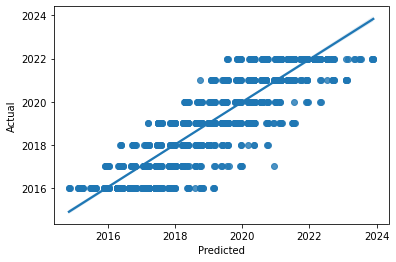

In [85]:
sns.regplot(x=y_pred,y=y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
newdf=pd.read_csv('data1.csv')

In [77]:



# Create a linear regression model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)


In [78]:
newdf

,Unnamed: 0,FacultyId,Name,Gender,Age,JoiningYear,Designation,AreaOfSpecialization,AppointmentType
0,0,0,John King,Male,54,2017,Assistant professor,Geotechnical Engineering,Conract
1,1,1,Elizabeth Oliver,Male,47,2023,Associate Professor,Chemical Engineering,Regular
2,2,2,Patricia Hunt,Male,60,2022,Research Professor,Mechanical Engineering,Regular
3,3,3,Jason Kelley,Male,51,2023,Director,Chemical Engineering,Approve
4,4,4,Stacy Martinez,Male,42,2021,Senior Professor,Data Science and Engineering,Conract
...,...,...,...,...,...,...,...,...,...
995,995,995,Raymond Hancock,Female,57,2021,Director,Computer Engineering,Approve
996,996,996,Margaret Fisher,Female,52,2021,Dean,Chemical Engineering,Approve
997,997,997,Matthew Torres,Male,60,2021,Dean,Robotics and Automation,Regular
998,998,998,Tyler Dunn,Female,51,2022,Assistant professor,Civil Engineering,Conract


In [91]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # X_train represents the input features, y_train represents the target variable

# Prepare the new dataset for prediction
#X_new = preprocess_new_data(new_data)  # Preprocess the new_data to match the format of the training data

# Make predictions on the new dataset
predictions = model.predict(newdf)


ValueError: could not convert string to float: 'John King'